### Boosting 
Boosting es una de las ideas de aprendizaje más poderosas presentadas en los últimos veinte años. Fue diseñada originalmente para problemas de clasificación, pero también puede ser usado beneficamente para problemas de regresión. La motivación para boosting es combinar las salidas de muchos clasificadores "debiles" para producir un "ensamble" más poderoso.
Desde esta perspectiva, boosting tiene un parecido con bagging y otros enfoques basados en ensambles. Sin embargo, veremos que la conexión es, en el mejor de los casos superficial y boosting es fundamentalmente diferente.
Comenzaremos por describir el algoritmo de boosting más popular gracias a  Freund and Schapire (1997) llamado "AdaBoost.M1." Considera un problema de dos clases, con la variable de salida codificada como $Y\in \{-1,1\}$. Dado un vector de variales predictoras $X$, un clasificador $G(X)$ produce una predicción tomando uno de las dos  posibles valores $\{-1,1\}$ La tasa de error en la muestra de entrenamieto es:

$$
\bar{err}=\dfrac{1}{N}\sum_{i=1}^N I(y_i\neq G(x_i))
$$
y la tasa de error esperada en predicciones futuras es $E_{XY} I(Y\neq G(X))$
Un clasificador más "débil" es el aquel cuya la tasa de error es ligeramente mejor que una elección  al azar. El propósito del boosting es aplicar secuencialmente el algoritmo de clasificación débil a versiones modificadas de la data repetidamente, por lo tanto producir una secuencia de clasificadores débiles $G_m(x)$ $m=1,2,3,...,M$.

<img src="boosting.png" width="200px">
Los clasificadores son entrenados con versiones ponderadas de los datos, y luego combinadas para producir una predicción final.


Las predicciones de todos ellos son combinadas mediante el voto mayoritario ponderado para producir la predicción final:
$$
\begin{equation}
G(x)=sign \left[ \sum_{m=1}^M \alpha_m G_m(x) \right]
\end{equation}
$$

Aqui $\alpha_1,..,\alpha_m$ son calculadas por el algoritmo boosting, y sopesa la contribucion de cada una respecto $G_m(x)$. Su efecto es dar una mayor influencia a los clasificadores más precisos en la sucesión.

La modificación de los datos en cada paso del boosting consiste en aplicar pesos de $w_1,...,w_M$a cada uno de los de las observaciones de entrenamiento $(x_1,y_i)$, $i=1,...,N$.
Inicialmente todos los pesos son configurados en $\dfrac{1}{N}$ de manera que en el primer paso simplemente se entrena el clasificador sobre los datos de la forma usual.
Para cada iteración sucesiva $m= 2,3,...., M$ la observación pesadas son individualmente modificados y el algoritmo de clasificación es reaplicado a las observaciones ponderadas.
En el paso m, las observaciones que fueron mal clasificadas por el clasificador $G_{m-1}(x)$ inducido en el paso anterior, han aumentado sus pesos, mientras que los pesos han disminuido para los que fueron clasificados correctamente. 
Así en las siguientes iteraciones, las observaciones que son más dificiles de clasificar correctamente, incrementan su influencia. 

#### Algoritmo
1. Inicializar las observaciones ponderadas por $w_i=1/N$ $i=1,..,N$
2. Para m= 1 a M:

(a) Ajustar un clasificador $G_m(x)$ a los datos de entrenamiento, usando pesos $w_i$

(b) Calcular:
 $$
 err_m=\dfrac{\sum_{i=1}^Nw_iI(y_i\neq G_m(x_i))}{\sum_{i=1}^Nw_i}
 $$
(c) Calcular $\alpha_m=\log((1-err_m)/err_m)$.

(d) Hacer $w_i\rightarrow w_i*\exp[\alpha_m I(y_i\neq G_m(x_i))]$ $i=1,2,...,N$
3. Salida $G(x) = sign \left[ \sum_{m=1}^M \alpha_m G_m(x) \right]$
 


In [42]:
from   sklearn.ensemble        import AdaBoostClassifier,GradientBoostingClassifier
from   sklearn.model_selection import train_test_split,cross_val_score
from   sklearn                 import tree
from   sklearn.metrics         import accuracy_score
import pandas                  as     pd
import matplotlib.pylab        as     plt
from   sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import numpy as np
from sklearn import metrics

In [43]:
data=pd.read_csv('coris.csv',sep=',',header=0)
data.shape
data.head(2)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1


In [44]:
y=data.pop("chd")
X=data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
seed=7
cart=tree.DecisionTreeClassifier(max_depth=7)
n_trees=100

In [46]:
boostingModel = AdaBoostClassifier(base_estimator=cart, n_estimators=n_trees,random_state=seed)
boostingModel.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=7,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [47]:
y_boost=boostingModel.predict(X_test)
print('Porcentaje de datos bien clasificados')
print(accuracy_score(y_test,y_boost))
print('número de datos bien clasificados')
accuracy_score(y_test,y_boost,normalize=False)

Porcentaje de datos bien clasificados
0.6834532374100719
número de datos bien clasificados


95

### Hiperparametros
1. $\mathcal{learning\_rate}$. Tasa de aprendizaje reduce la contribución de cada árbol en la tasa de aprendizaje

In [16]:
param_grid = {
    'base_estimator__max_depth' : [4,5,7,8,9,10],
    'n_estimators' :[i for i in range(10,120,1)],
    'learning_rate':[0.1,0.5,1]
}

boostingModelHiper = GridSearchCV(AdaBoostClassifier(tree.DecisionTreeClassifier(ccp_alpha= 0.015)),param_grid, scoring = 'accuracy')
boostingModelHiper.fit(X_train, y_train)
boostingModelHiper.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 10,
 'n_estimators': 111}

In [17]:
y_boosthip=boostingModel.predict(X_test)
print('Porcentaje de datos bien clasificados')
print(accuracy_score(y_test,y_boosthip))
print('número de datos bien clasificados')
accuracy_score(y_test,y_boosthip,normalize=False)

Porcentaje de datos bien clasificados
0.6834532374100719
número de datos bien clasificados


95

array([[0.70754717, 0.45454545],
       [0.29245283, 0.54545455]])

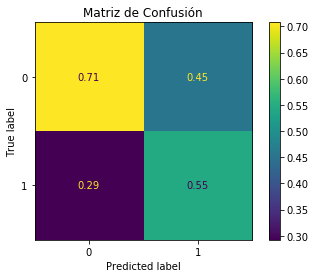

In [48]:
disp=metrics.plot_confusion_matrix(boostingModelHiper, X_test, y_test,normalize="pred")
disp.ax_.set_title("Matriz de Confusión")
disp.confusion_matrix

In [19]:
#calculo de las probabilidades y el AUC
probs = boostingModelHiper.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

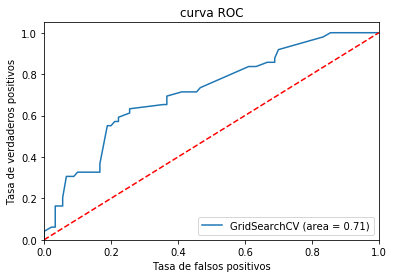

In [20]:
plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('curva ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Gradient Tree Boosting o Gradient Boosted Decision Trees (GBDT) 
Es una generalización de Boosting a funciones de pérdida diferenciables arbitrarias. GBDT es un procedimiento estándar preciso y eficaz que se puede utilizar para problemas de regresión y clasificación en una variedad de áreas.

El módulo sklearn.ensemble proporciona métodos para clasificación y regresión a través de árboles de decisión potenciados por gradientes.

In [49]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=7, random_state=seed)
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [50]:
y_clf=clf.predict(X_test)
print('Porcentaje de datos bien clasificados')
print(accuracy_score(y_test,y_clf))
print('número de datos bien clasificados')
accuracy_score(y_test,y_clf,normalize=False)

Porcentaje de datos bien clasificados
0.6690647482014388
número de datos bien clasificados


93

In [52]:
param_grid = {
    'max_depth':[3,4,5,6,7,8,9,10],
    'n_estimators' :[i for i in range(10,120,1)],
    'learning_rate':[0.1, 0.5,1],
}

gradboostingModelHiper = GridSearchCV(GradientBoostingClassifier(max_depth=7, random_state=seed),param_grid, scoring = 'accuracy')
gradboostingModelHiper.fit(X_train, y_train)
gradboostingModelHiper.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 90}

In [53]:
y_boostgrad=gradboostingModelHiper.predict(X_test)
print('Porcentaje de datos bien clasificados')
print(accuracy_score(y_test,y_boostgrad))
print('número de datos bien clasificados')
accuracy_score(y_test,y_boostgrad,normalize=False)

Porcentaje de datos bien clasificados
0.7050359712230215
número de datos bien clasificados


98

In [ ]:
acc=0.7, num=98

array([[0.74747475, 0.4       ],
       [0.25252525, 0.6       ]])

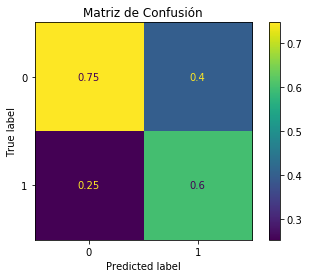

In [54]:
disp=metrics.plot_confusion_matrix(gradboostingModelHiper, X_test, y_test,normalize="pred")
disp.ax_.set_title("Matriz de Confusión")
disp.confusion_matrix

In [38]:
#calculo de las probabilidades y el AUC
probs = gradboostingModelHiper.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

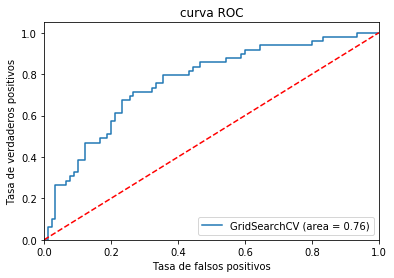

In [39]:
plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('curva ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()